<a href="https://colab.research.google.com/github/phnuness/emd-desafio-junior-data-scientist/blob/main/analise_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Objetivo

O objetivo deste notebook é responder as questões propostas no desafio de Cientista de Dados Jr do Escritório de Dados.

In [ ]:
# Depois de muita pesquisa na internet este foi o modelo de pip o qual consegui fazer a instalação da biblioteca basedosdados
# O pip precisa ser executado 2 vezes no gogole colab, na primeira vez será apresentado um erro, clique em 'restart session' e execute a célula novamente
%pip install basedosdados --use-deprecated=legacy-resolver


In [3]:
# Importando a biblioteca e o pandas
import basedosdados as bd
import pandas as pd

# Questões propostas e resolução

Nesta seção podemos verificar as respostas para cada questão do desafio e a forma como a mesma foi encontrada.

In [ ]:
# Realizando a query na tabela de chamados para criar o dataframe
query = '''

SELECT
  id_chamado, data_inicio, data_fim, id_bairro, tipo, subtipo
FROM
  `datario.administracao_servicos_publicos.chamado_1746`

'''
df_chamados = bd.read_sql(query, billing_project_id="cellular-tide-414417")

Downloading: 100%|██████████| 10742832/10742832 [16:28<00:00, 10870.12rows/s]


1. Quantos chamados foram abertos no dia 01/04/2023?

In [ ]:
# Filtrando a quantidade de chamados abertos na data 01/04/2023
questao_1 = len(df_chamados.loc[(df_chamados.data_inicio >= '2023-04-01') & (df_chamados.data_inicio < '2023-04-02')])

print(f'No dia 01/04/2023, foram abertos um total de {questao_1} chamados.')

No dia 01/04/2023, foram abertos um total de 73 chamados.


2. Qual o tipo de chamado que teve mais reclamações no dia 01/04/2023?

In [ ]:
# Filtrando a coluna tipo para identificar o tipo com mais reclamações no dia 01/04/2023
questao_2 = df_chamados['tipo'].loc[(df_chamados.data_inicio >= '2023-04-01') & (df_chamados.data_inicio < '2023-04-02')].value_counts().head(1)

# Imprimindo o índice junto com o valor
for index, value in questao_2.iteritems():
    print(f" No dia 01/04/2023 o tipo de chamado que teve mais reclamações foi {index} com {value} chamados.")

 No dia 01/04/2023 o tipo de chamado que teve mais reclamações foi Poluição sonora com 24 chamados.


3. Quais os nomes dos 3 bairros que mais tiveram chamados abertos nesse dia?

In [ ]:
# Realizando a query na tabela de bairros para criar o dataframe
query2 = '''

SELECT
   id_bairro, subprefeitura, nome as nome_bairro
FROM
  `datario.dados_mestres.bairro`

'''
df_bairros = bd.read_sql(query2, billing_project_id="cellular-tide-414417")

Downloading: 100%|██████████| 164/164 [00:00<00:00, 547.69rows/s]


In [ ]:
# Criando um dataframe com o join entre as tabelas chamado e bairro
df_chamados_bairros = df_chamados[['id_chamado','data_inicio','id_bairro']].merge(df_bairros[['id_bairro', 'nome_bairro', 'subprefeitura']],
                                                                  how='left', on='id_bairro')

In [ ]:
# Filtrando a coluna nome_bairro para identificar o bairro com mais reclamações no dia 01/04/2023
questao_3 = df_chamados_bairros['nome_bairro'].loc[(df_chamados_bairros.data_inicio >= '2023-04-01') &
            (df_chamados_bairros.data_inicio < '2023-04-02')].value_counts().head(3)

# Imprimindo o DataFrame com formatação
print("Top 3 bairros com mais chamados no dia 01/04/2023:")
for index, value in questao_3.iteritems():
    print(f"{index}: {value} chamados")


Top 3 bairros com mais chamados no dia 01/04/2023:
Engenho de Dentro: 8 chamados
Campo Grande: 6 chamados
Leblon: 6 chamados


4. Qual o nome da subprefeitura com mais chamados abertos nesse dia?

In [ ]:
# Filtrando a coluna subprefeitura para identificar a subprefeitura com mais reclamações no dia 01/04/2023
questao_4 = df_chamados_bairros['subprefeitura'].loc[(df_chamados_bairros.data_inicio >= '2023-04-01') &
 (df_chamados_bairros.data_inicio < '2023-04-02')].value_counts().head(1)

# Imprimindo o índice junto com o valor
for index, value in questao_4.iteritems():
    print(f" O nome da subprefeitura com mais chamados abertos nesse dia foi {index} com {value} chamados.")

 O nome da subprefeitura com mais chamados abertos nesse dia foi Zona Norte com 25 chamados.


5. Existe algum chamado aberto nesse dia que não foi associado a um bairro ou   subprefeitura na tabela de bairros? Se sim, por que isso acontece?

In [ ]:
# Filtrando o df2 para identificar a se existe algum chamado aberto sem bairro ou subprefeitura definido
questao_5 = df_chamados_bairros.loc[(df_chamados_bairros.data_inicio >= '2023-04-01') &
            (df_chamados_bairros.data_inicio < '2023-04-02') & (df_chamados_bairros.id_bairro.isnull())]
print('Sim, este fenômeno acontece por motivos de dados ausentes ou não informados (null)\n\n', questao_5)

Sim, este fenômeno acontece por motivos de dados ausentes ou não informados (null)

         id_chamado         data_inicio id_bairro nome_bairro subprefeitura
6493241   18516246 2023-04-01 00:55:38      None         NaN           NaN


6. Quantos chamados com o subtipo "Perturbação do sossego" foram abertos desde 01/01/2022 até 31/12/2023 (incluindo extremidades)?

In [ ]:
# Filtrando o df para identificar a quantidade de chamados com o subtipo 'Perturbação do sossego'
questao_6 = df_chamados['subtipo'].loc[(df_chamados.data_inicio >= '2022-01-01') &
 (df_chamados.data_inicio <= '2023-12-31') & (df_chamados.subtipo == 'Perturbação do sossego')].count()

print(f"Entre 01/01/2022 e 31/12/2023 foram abertos {questao_6} chamados com o subtipo Perturbação do sossego")

Entre 01/01/2022 e 31/12/2023 foram abertos 42408 chamados com o subtipo Perturbação do sossego


7. Selecione os chamados com esse subtipo que foram abertos durante os eventos contidos na tabela de eventos (Reveillon, Carnaval e Rock in Rio).

In [ ]:
# Realizando a query na tabela de eventos para criar o dataframe
query3 = '''

SELECT
  *
FROM
  `datario.turismo_fluxo_visitantes.rede_hoteleira_ocupacao_eventos`

'''
df_eventos = bd.read_sql(query3, billing_project_id="cellular-tide-414417")

Downloading: 100%|██████████| 4/4 [00:00<00:00, 16.02rows/s]


In [ ]:
# Convertando as colunas data_inicial e data_final do df de eventos para datetime
df_eventos['data_inicial'] = pd.to_datetime(df_eventos['data_inicial'])
df_eventos['data_final'] = pd.to_datetime(df_eventos['data_final'])

In [ ]:
# Selecionando os chamados com subtipo "Perturbação do sossego"
df_chamados_perturbacao = df_chamados[df_chamados['subtipo'] == 'Perturbação do sossego']

In [ ]:
# Função que verifica se a data de início do chamado está dentro do intervalo de algum dos eventos
def get_evento(data_inicio):
    eventos = df_eventos[(data_inicio >= df_eventos['data_inicial']) & (data_inicio <= df_eventos['data_final'])]
    if len(eventos) > 0:
        return eventos.iloc[0]['evento']
    else:
        return None

# Criando a nova coluna "evento" no dataframe df_chamados
df_chamados_perturbacao['evento'] = df_chamados_perturbacao['data_inicio'].apply(get_evento)

# Apresentando a seleção de chamados
df_chamados_perturbacao = df_chamados_perturbacao.loc[~df_chamados_perturbacao.evento.isna()]
df_chamados_perturbacao

,id_chamado,data_inicio,data_fim,id_bairro,tipo,subtipo,evento
99045,18333135,2023-02-20 22:36:03,2023-02-24 08:06:30,121,Poluição sonora,Perturbação do sossego,Carnaval
99461,18332881,2023-02-20 19:06:17,2023-02-24 07:44:14,115,Poluição sonora,Perturbação do sossego,Carnaval
99462,18329965,2023-02-19 08:35:48,2023-02-27 08:50:45,128,Poluição sonora,Perturbação do sossego,Carnaval
99809,18331227,2023-02-19 23:05:17,2023-02-28 09:47:50,14,Poluição sonora,Perturbação do sossego,Carnaval
99892,17678478,2022-09-08 22:05:13,2022-09-16 10:49:16,88,Poluição sonora,Perturbação do sossego,Rock in Rio
...,...,...,...,...,...,...,...
10577986,17661846,2022-09-03 05:36:19,2022-09-11 08:23:44,14,Poluição sonora,Perturbação do sossego,Rock in Rio
10577987,17682500,2022-09-09 22:23:40,2022-09-17 10:37:39,20,Poluição sonora,Perturbação do sossego,Rock in Rio
10577993,17678512,2022-09-08 22:45:08,2022-09-09 05:09:59,27,Poluição sonora,Perturbação do sossego,Rock in Rio
10578210,17663444,2022-09-03 22:14:37,2022-09-11 09:52:09,24,Poluição sonora,Perturbação do sossego,Rock in Rio


8. Quantos chamados desse subtipo foram abertos em cada evento?

In [ ]:
# Realizando um groupby por eventos no df filtrado com chamados do subtipo "Perturbação do sossego" df_chamados_perturbacao
quantidade_chamados_evento = pd.DataFrame(df_chamados_perturbacao.groupby(['evento'])['id_chamado'].count()).rename(columns={'id_chamado': 'qnt_chamados'}).reset_index()

# Imprimindo o DataFrame com formatação
print("Quantidade de chamados abertos por evento:")
for index, row in quantidade_chamados_evento.iterrows():
    print(f"{row['evento']}: {row['qnt_chamados']} chamados")

Quantidade de chamados abertos por evento:
Carnaval: 197 chamados
Reveillon: 79 chamados
Rock in Rio: 518 chamados


9. Qual evento teve a maior média diária de chamados abertos desse subtipo?

In [ ]:
# Importando a biclioteca para manipulação de datas
from datetime import timedelta

# Calculando a duração de cada evento
df_eventos['dias_evento'] = ((df_eventos['data_final'] - df_eventos['data_inicial']) + timedelta(days=1)).dt.days
duracao_eventos = pd.DataFrame(df_eventos.groupby(df_eventos['evento'])['dias_evento'].sum()).reset_index()

# Calculando a média diária de chamados por evento
media_diaria = pd.merge(quantidade_chamados_evento, duracao_eventos, on='evento')
media_diaria['media_chamados_por_dia'] = media_diaria['qnt_chamados'] / media_diaria['dias_evento']

print(f"O evento com a maior média diária de chamados abertos desse subtipo é o: {media_diaria['evento'].max()} ")

O evento com a maior média diária de chamados abertos desse subtipo é o: Rock in Rio 


10. Compare as médias diárias de chamados abertos desse subtipo durante os eventos específicos (Reveillon, Carnaval e Rock in Rio) e a média diária de chamados abertos desse subtipo considerando todo o período de 01/01/2022 até 31/12/2023.

In [ ]:
# Importando a biclioteca para manipulação de datas
from datetime import datetime

# Criando os objetos datetime para as datas fornecidas
data_inicio = datetime(2022, 1, 1)
data_fim = datetime(2023, 12, 31)

# Calculando a quantidade de dias total com esse subtipo de chamado
qnt_dias = ((data_fim - data_inicio) + timedelta(days=1)).days

# Calculando a média diária total com esse subtipo de chamado
media_diaria_chamado = questao_6 / qnt_dias



In [ ]:
# Novos valores para a nova linha
nova_linha = {'evento': 'Período Geral', 'media_chamados_por_dia': media_diaria_chamado}

# Adicionando a nova linha ao DataFrame
questao_10 = media_diaria[['evento','media_chamados_por_dia']].append(nova_linha, ignore_index=True)

# Imprimindo o DataFrame com formatação
print("Médias diárias de chamados abertos:")
for index, row in questao_10.iterrows():
    print(f"{row['evento']}: {row['media_chamados_por_dia'].%2} dias em média")

Médias diárias de chamados abertos:
Carnaval: 49.25 dias em média
Reveillon: 26.333333333333332 dias em média
Rock in Rio: 74.0 dias em média
Período Geral: 58.09315068493151 dias em média


# Análise Descritiva Simples

Nesta seção poderemos ver algumas outras análises e gráficos sobre os dados.
Não irei utilizar toda a massa de dados, assim como não irei realizar os melhores tratamentos ou análises pois faço apenas por curiosidade.

Realizando query na tabela modificada criada

In [25]:
# Realizando a query na tabela de chamados para criar o dataframe com todas as colunas mas com limite de 100k de linhas
query = '''

SELECT *
FROM `cellular-tide-414417.Chamados.chamados_full`
LIMIT 100000

'''
df_chamados = bd.read_sql(query, billing_project_id="cellular-tide-414417")

Downloading: 100%|██████████| 100000/100000 [00:14<00:00, 6698.93rows/s]


Análise descritiva da tabela de chamados

In [ ]:
# Visualizando as 5 primeiras linhas do df
pd.set_option('display.max_columns', None)
df_chamados.head()

In [ ]:
# Visualizando as informarções do df
df_chamados.info()

In [ ]:
# Identificando a quantidade de null
df_chamados.isna().sum()

In [ ]:
# Realizando um describe das colunas categóricas
import numpy as np
df_chamados.describe(exclude=np.number)

In [33]:
# Realizando o drop das colunas que não serão utilizadas
df_chamados.drop(columns=['longitude','latitude'], inplace=True)

In [34]:
# Realizando o preenchimento de informação na coluna evento
df_chamados['evento'].fillna('Sem evento', inplace=True)

In [36]:
# Realizando o drop de linhas com informações vazias sem utilizar muito critério
df_chamados = df_chamados.dropna(axis=0)

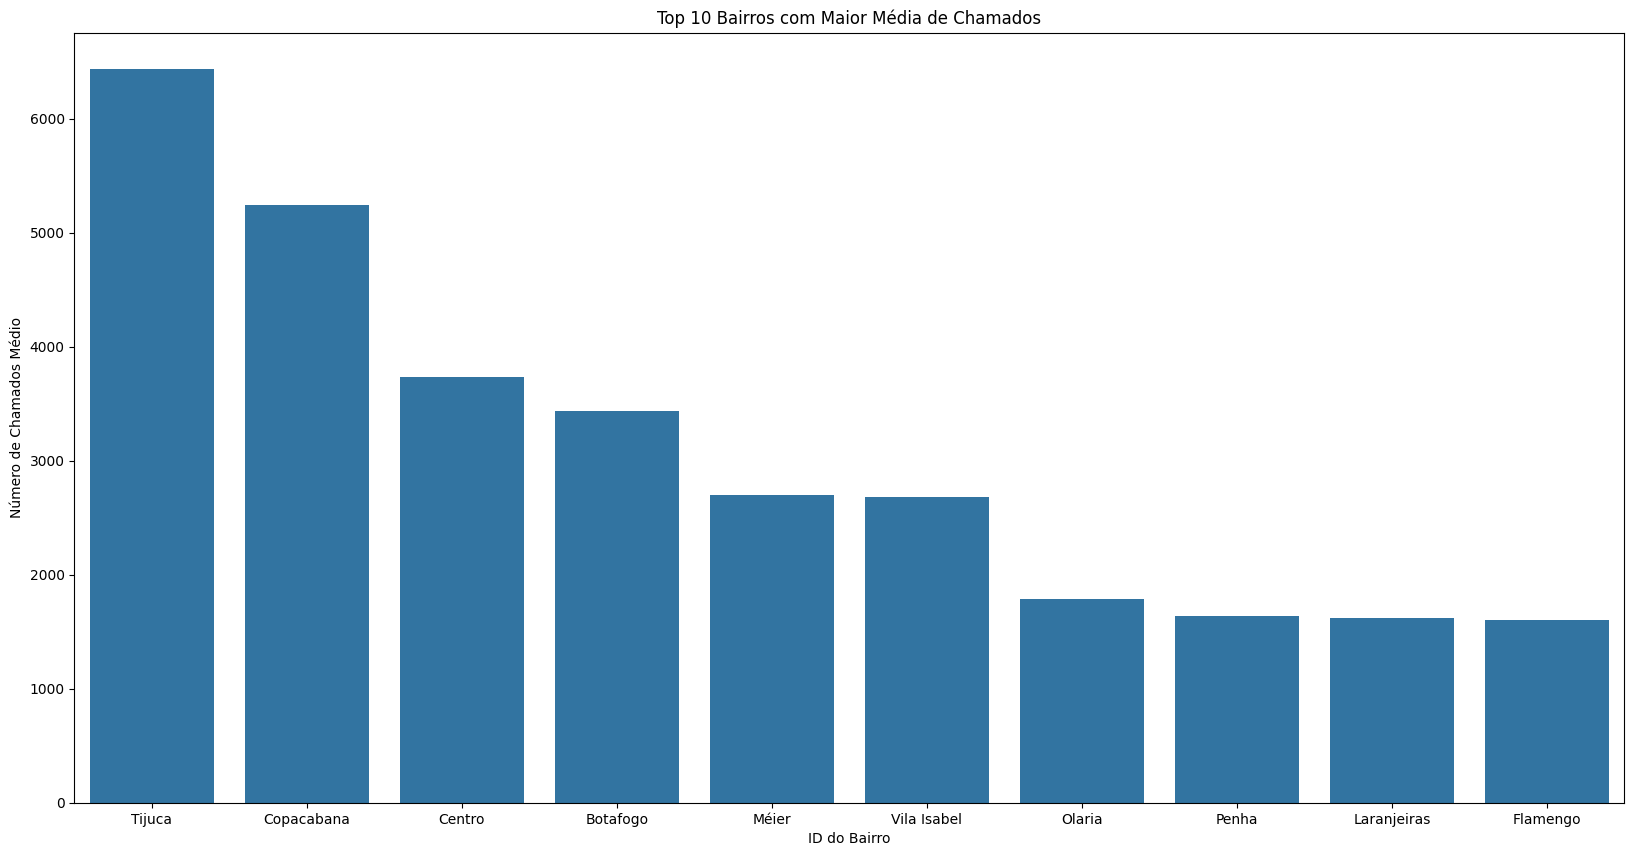

In [40]:
# Gráfico: Média de chamados por bairro (top 10)
plt.figure(figsize=(20, 10))
top_bairros = df_chamados['nome_bairro'].value_counts().nlargest(10)
sns.barplot(x=top_bairros.index, y=top_bairros.values)
plt.title('Top 10 Bairros com Maior Média de Chamados')
plt.xlabel('ID do Bairro')
plt.ylabel('Número de Chamados Médio')
plt.show()

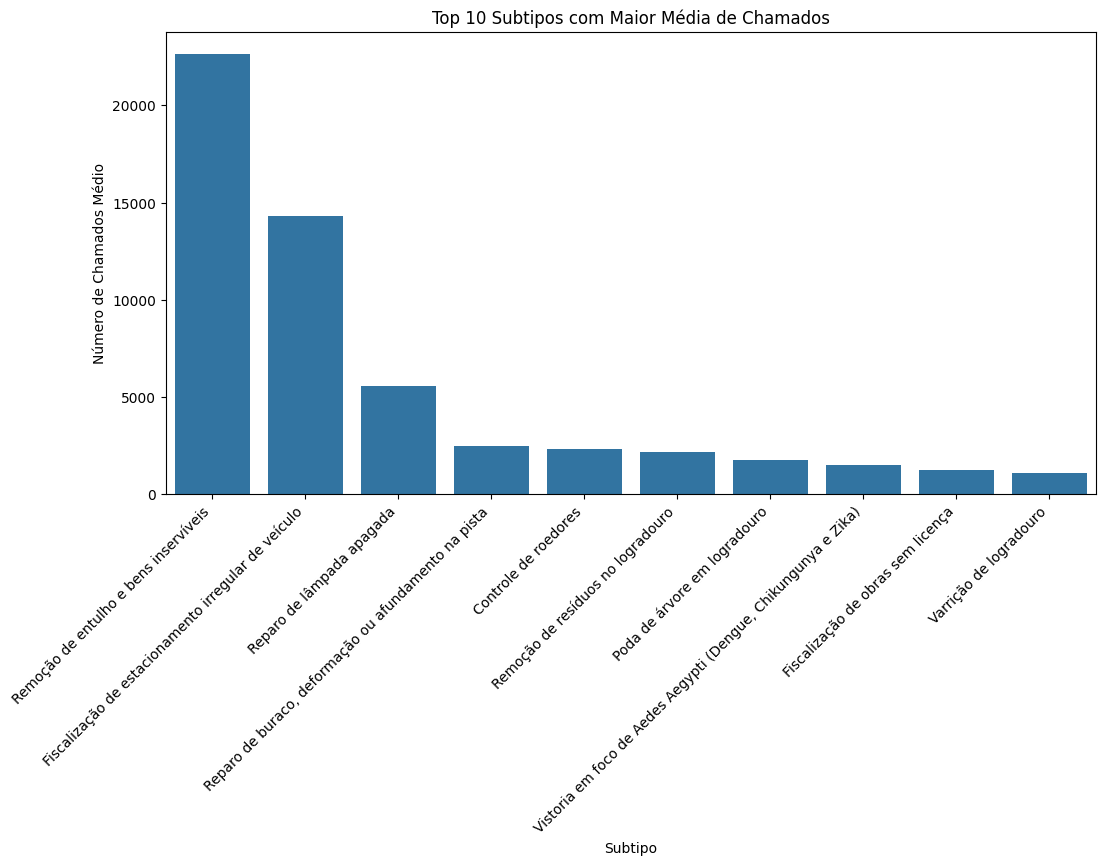

In [41]:
# Gráfico: Média de chamados por subtipo (top 10)
plt.figure(figsize=(12, 6))
top_subtipos = df_chamados['subtipo'].value_counts().nlargest(10)
sns.barplot(x=top_subtipos.index, y=top_subtipos.values)
plt.title('Top 10 Subtipos com Maior Média de Chamados')
plt.xlabel('Subtipo')
plt.ylabel('Número de Chamados Médio')
plt.xticks(rotation=45, ha='right')
plt.show()

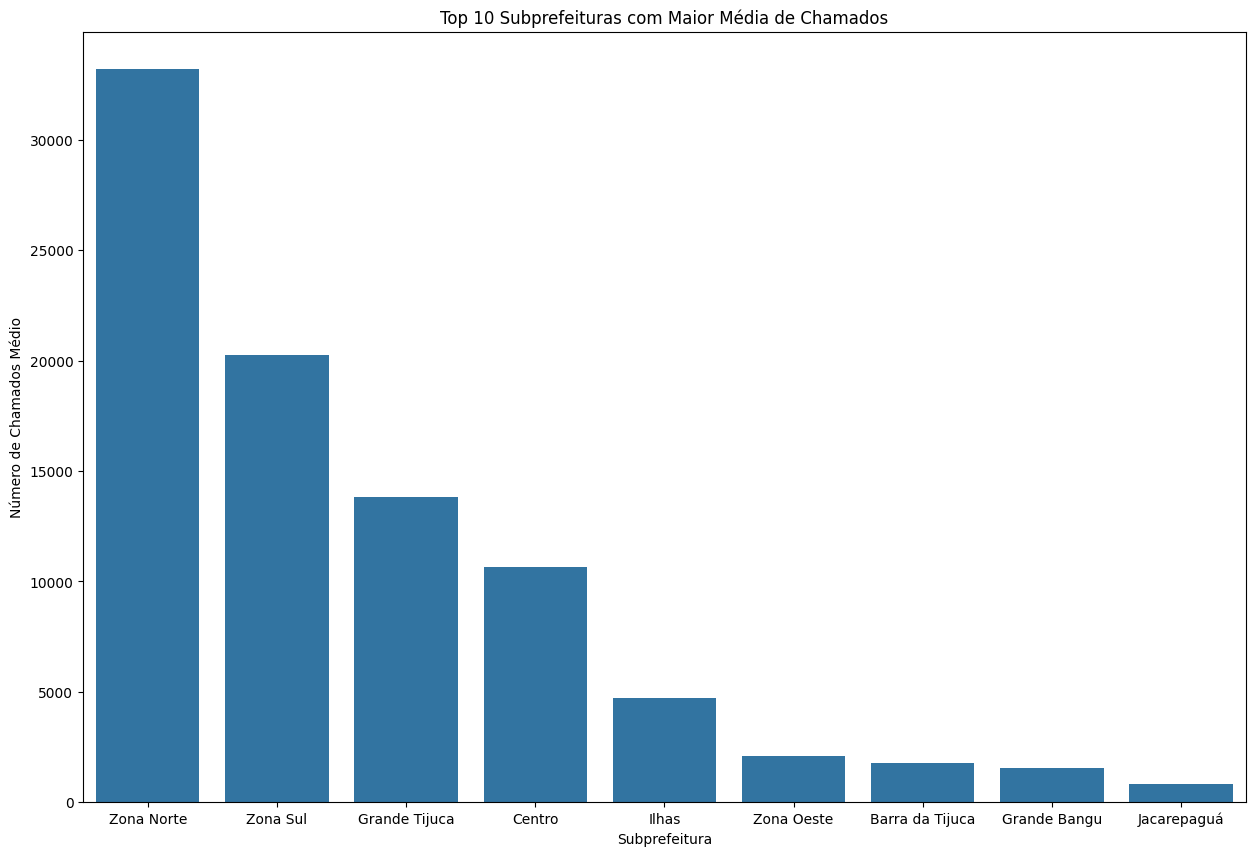

In [42]:
# Gráfico: Média de chamados por subprefeitura (top 10)
plt.figure(figsize=(15, 10))
top_subprefeituras = df_chamados['subprefeitura'].value_counts().nlargest(10)
sns.barplot(x=top_subprefeituras.index, y=top_subprefeituras.values)
plt.title('Top 10 Subprefeituras com Maior Média de Chamados')
plt.xlabel('Subprefeitura')
plt.ylabel('Número de Chamados Médio')
plt.show()

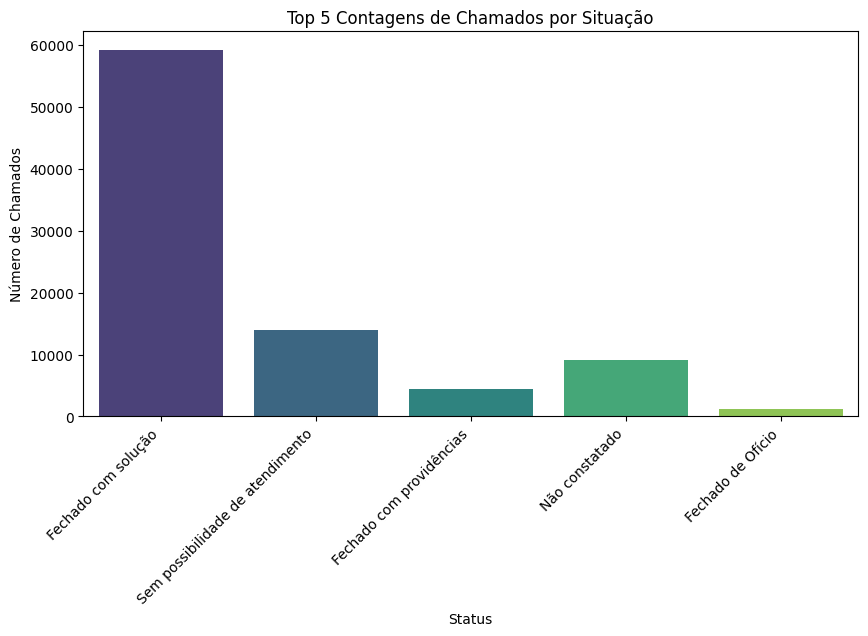

In [62]:
# Gráfico: Top 10 contagens de chamados por situação
plt.figure(figsize=(10, 5))
top_situacoes = df_chamados['status'].value_counts().nlargest(5).index

df_top_situacoes = df_chamados[df_chamados['status'].isin(top_situacoes)]

sns.countplot(x='status', data=df_top_situacoes, palette='viridis')
plt.title('Top 5 Contagens de Chamados por Situação')
plt.xlabel('Status')
plt.ylabel('Número de Chamados')
plt.xticks(rotation=45, ha='right')
plt.show()